   # Data Analytics of the literature review-An enhanced deep learning framework towards the accurate analysis of sequential irregular patterns 

In [174]:
from numpy.random import seed
seed(1)
from tensorflow import set_random_seed
set_random_seed(2)

In [175]:
import pickle
import nltk
from nltk.corpus import stopwords
from nltk import FreqDist
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer
import spacy
from tqdm import tqdm
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.utils import plot_model
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from wordcloud import WordCloud
import folium
import pandas as pd

In [176]:
df=pd.read_csv('Database.csv')
df.head()

,JournalName,PaperTittle,Year,Country,Continent,DataSet,DataSetType,ResearchProblem,ResearchObjective,ImplementationFramework,ArchitectureProperties,BaselineModels,BestModels,Methodology,EvaluationMechanism,EvaluationMetric
0,Association for the Advancement of Artificial ...,A Memory-Network Based Solution for Multivaria...,2018,Taiwan,Asia,univariate and multivariate sequential dataset...,sequential,Complexity in modelling and capturing extremel...,To propose an explainable sequential forecasti...,8 models were designed namely autogressive mod...,The MTNet model utilized recurrent neural netw...,"Autoregressive model (AR), autoregressive mode...",Memory Time series network (MTNet),Comparative experimental approach,Prediction accuracy,Root mean squared error (RMSE) and mean absolu...
1,AAAI Conference on Artificial Intelligence (AA...,Particle Filter Recurrent Neural Networks,2019,Singapore,Asia,sequence datasets from multiple domains for bo...,Sequence,Sequential data prediction problem associated ...,To propose a particle filter recurrent neural ...,particle filter recurrent neural networks (PF-...,Hyperparameter tuning= grid search,"PF-LSTM, PF-GRU with LSTM and GRU",particle filter recurrent neural networks (PF-...,Experimental simulation,Prediction accuracy,Mean Square Error (MSE)
2,32nd Conference on Neural Information Processi...,Benchmarking Deep Sequential Models on Volatil...,2018,Canada,North America,Financial stock price,Sequential,Volatility prediction modelling problem,Studying the performance of latest deep sequen...,"Dilated temporal convolutional network (TCN), ...",All recurrent models adopt GRU as their basic ...,"Dilated temporal convolutional network (TCN), ...",DilatedRNN and Dialated CNN,Experimental simulation,Prediction accuracy,Average Negative Log-Likelihood (NLL).
3,2nd International Conference on Advances in En...,Deep Learning for Time Series Forecasting: The...,2019,Switzerland,Europe,Power consumption and weather data,Sequential time series,electric load forecasting volatility problems,A systematic experimental analysis of state of...,Feed Forward Neural Networks (FFNN) with archi...,Implemented in Keras 2.12 with Tensorflow as b...,Feed Forward Neural Networks (FFNN) with archi...,LSTM,Comparative,Prediction accuracy,"Root Mean Squared Error (RMSE), Mean Absolute ..."
4,IEEE Communications Magazine,Deep Learning with Long Short-Term Memory for ...,2019,NaN,NaN,Trafic data,Sequential,Learning long range dependencies problem in se...,To reduce considerable computing cost of deep ...,Random Connectivity LSTM (RCLSTM) framework,The deep learning framework had a three-layer ...,FFNN and LSTM,RCLSTM and LSTM,Comparative,Prediction accuracy and efficiency,Root Mean Square Error (RMSE)


## Exploratory data analysis of the literature excel infor
This refers to all techniques applied to get more insights from the data. This includes the use of visualisations that summarise the data.

In [177]:
country_geo = 'world-countries.json'

In [178]:
df.tail()

,JournalName,PaperTittle,Year,Country,Continent,DataSet,DataSetType,ResearchProblem,ResearchObjective,ImplementationFramework,ArchitectureProperties,BaselineModels,BestModels,Methodology,EvaluationMechanism,EvaluationMetric
26,Proceedings of the 30th International Conferen...,MOrdReD: Memory-based Ordinal Regression Deep ...,2018,United Kingdom,Europe,Time series,Sequential time series,Robust and accuracy challenges associated with...,To develop a state-of-the-art memory-based ord...,Memory-Based Ordinal Regression Deep Neural Ne...,MOrdReD models environment= Python 2.7 and usi...,"RNN regression, Autoregressive modelling of or...",Memory-Based Ordinal Regression Deep Neural Ne...,Experimental simulation,Prediction accuracy,Symmetric Mean Absolute Percentage Error (SMAP...
27,Journal of Advances in Modelling Earth Systems...,Analog forecasting of extreme-causing weather ...,2019,United States of America,North America,weather,Sequential,Numerical weather prediction (NWP) models requ...,To propose a state of the art multi-variate da...,Capsule Neural Network (CapsNet),"CapsNet had 2 CNN layers and ReLU layers, filt...","CNN, Logistic Regression, Capsule Neural Network",Capsule Neural Network (CapsNet),Experimental simulation,Prediction accuracy,Recalls
28,Neurocomputing,Probabilistic Forecasting with Temporal Convol...,2019,China,Asia,Real world industrial data and benchmark publi...,Sequential time series,Forecasting deficiencies in accurate capturing...,To present a deep probabilistic forecasting fr...,NaN,DeepTCN consist of stacked residual blocks bas...,"Seasonal ARIMA (SARIMA), Gradient boosting tre...",NaN,NaN,Prediction accuracy and efficiency,"Symmetric Mean Absolute Percent Error (SMAPE),..."
29,2019 IEEE International Conference on Big Data...,Recurrent Neural Networks for Time Series Fore...,2019,Australia,Australia,Forecasting competitions,Sequential time series,Performance challenges associated with sequent...,To present an extensive empirical study of exi...,Recurrent neural network (RNN) architectures,"Application of different optimisers (Adam, Ada...","Statistical ETS, ARIMA, Elman Recurrent Unit,...",Recurrent neural network (RNN) architectures,Experimental simulation,Prediction accuracy,Mean Symmetric Mean Absolute Percentage Error ...
30,Journal of Advanced Transportation,ST-LSTM: A Deep Learning Approach Combined Spa...,2019,China,Asia,Traffic,sequential,Solving irregular variations in sequential tra...,To study and improve short-term traffic foreca...,Spatio-temporal long short-term network (ST-LSTM),"ST-LSTM Network. Based on LSTM network, a full...","Seasonal ARIMA (SARIMA) [23], Support Vector R...",Spatio-temporal long short-term network (ST-LSTM),Experimental simulation,"Predicion ccuracy, stability and efficiency","ME, MAE, RMSE, MRE and Operation time"


In [179]:
df.dtypes

JournalName                object
PaperTittle                object
Year                        int64
Country                    object
Continent                  object
DataSet                    object
DataSetType                object
ResearchProblem            object
ResearchObjective          object
ImplementationFramework    object
ArchitectureProperties     object
BaselineModels             object
BestModels                 object
Methodology                object
EvaluationMechanism        object
EvaluationMetric           object
dtype: object

# Visualisations

In [180]:
def freq_words(x, terms = 30):
  all_words = ' '.join([text for text in x])
  all_words = all_words.split()
  
  fdist = FreqDist(all_words)
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})
  
  # selecting top n most frequent words
  d = words_df.nlargest(columns="count", n = terms) 
  plt.figure(figsize=(20,5))
  ax = sns.barplot(data=d, x= "word", y = "count")
  ax.set(ylabel = 'Count')
  plt.show()

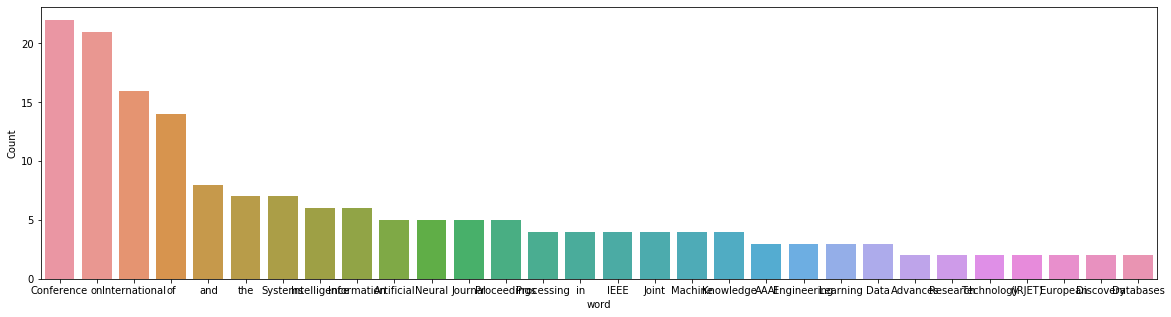

In [181]:
freq_words(df['JournalName'])

From the above analysis, one can deduce that the most frequent words in the dataset are words that have litle effect on meaning. Words such as "to, in, the" have to be dropped to improve the acurace of the model.

## Feature Engineering

In [182]:
nlp = spacy.load('en_core_web_sm')
nlp.vocab['however'].is_stop = False
nlp.vocab['no'].is_stop = False
nlp.vocab['not'].is_stop = False
nlp.vocab['but'].is_stop = False
nlp.vocab['ve'].is_stop = True

### Removing stop words and tokenizing

In [183]:
def strip_stopwords(Headline):
    s = []
    for r in tqdm(Headline):
        s_2 = []
        for token in r:
            if nlp.vocab[token].is_stop == True:
                continue
            else:
                s_2.append(token)
        s.append(" ".join(s_2))    
        
    return s

def tokenization(x):
    Headline_tokens = []
    for i in tqdm(x):
        i = nlp(i)
        temp = []
        for j in i:
            temp.append(j.text)
        Headline_tokens.append(temp)
    
    return Headline_tokens

In [184]:
df['BestModels'] = tokenization(df['JournalName'])

100%|█████████████████████████████████████████████████████████████████████████████████| 31/31 [00:00<00:00, 101.12it/s]


In [185]:
df['BestModels']=strip_stopwords(df['JournalName'])

100%|███████████████████████████████████████████████████████████████████████████████| 31/31 [00:00<00:00, 10954.88it/s]


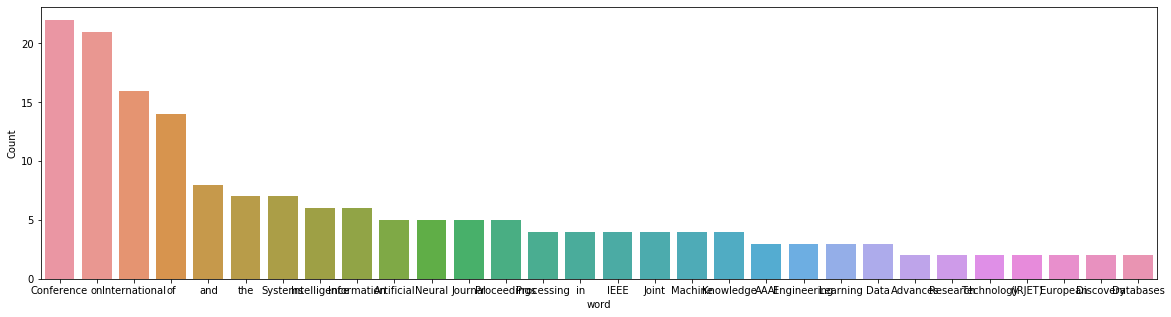

In [186]:
freq_words(df['JournalName'])

In [187]:
def word_cloud(text):
    #We get the directory that we are working on
    x, y = np.ogrid[:300, :300]
    mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
    mask = 255 * mask.astype(int)
    #We read the mask image into a numpy array
    #avengers_mask = np.array(Image.open(os.path.join(file, "avengers.png")))
    #We generate the wordcloud using the series created and the mask 
    word_cloud = WordCloud(width=2000, height=1000, max_font_size=200, 
                           background_color="black", max_words=2000, mask=mask, 
                           contour_width=1, contour_color="steelblue", 
                           colormap="nipy_spectral").generate(text)

    #Now we plot the figure
    plt.figure(figsize=(10,10))
    plt.imshow(word_cloud, interpolation="hermite")
    plt.axis("off")    
    plt.show()   

### Word cloud for the dataset
In this literature analysis the word cloud is an image composed of words used in our research search space, in which the size of each word indicates its frequency.

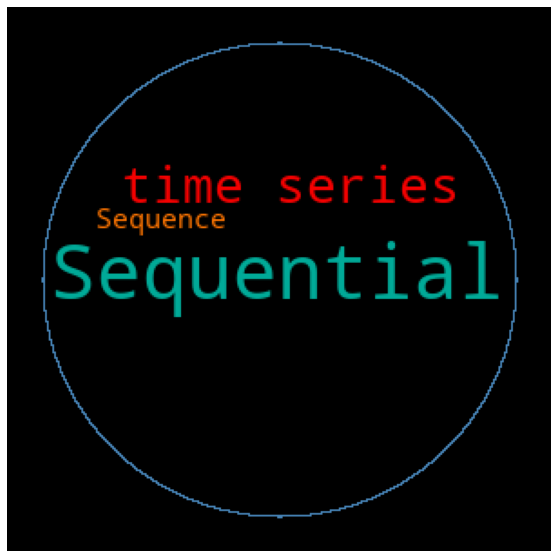

In [188]:
word_cloud(pd.Series([t for t in df.DataSetType]).str.cat(sep=' '))      

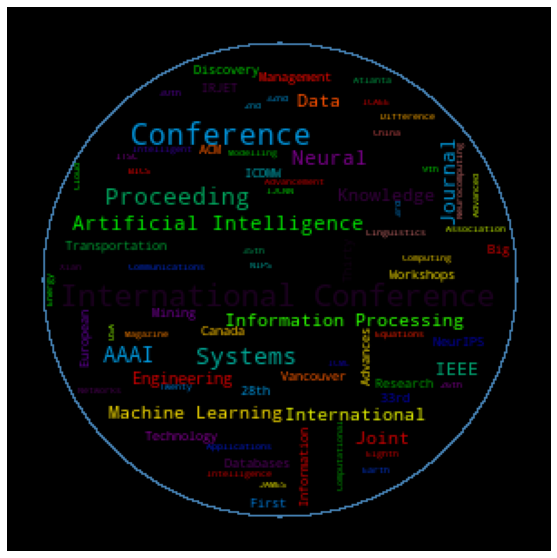

In [189]:
word_cloud(pd.Series([t for t in df.JournalName]).str.cat(sep=' '))      

As can be seen above, after removing stop words the visualisation of frequent words consists of the more meaningful words

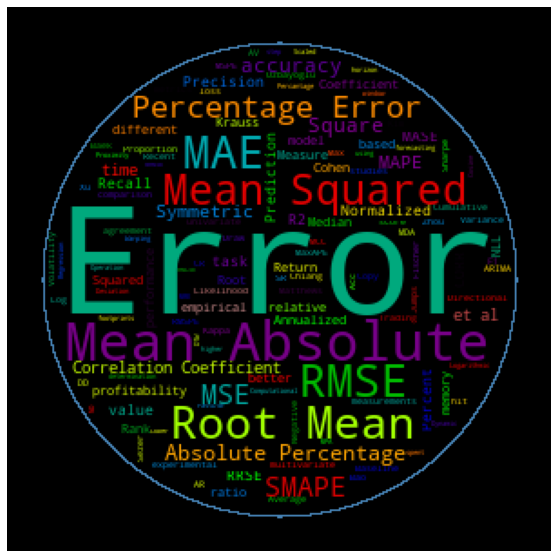

In [167]:
word_cloud(pd.Series([t for t in df.EvaluationMetric]).str.cat(sep=' '))   

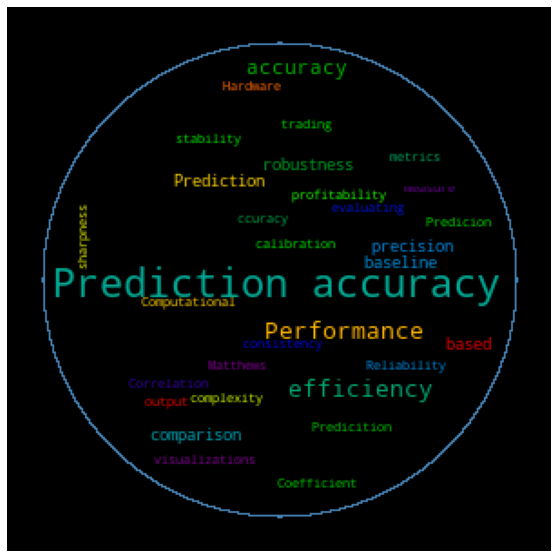

In [168]:
word_cloud(pd.Series([t for t in df.EvaluationMechanism]).str.cat(sep=' ')) 

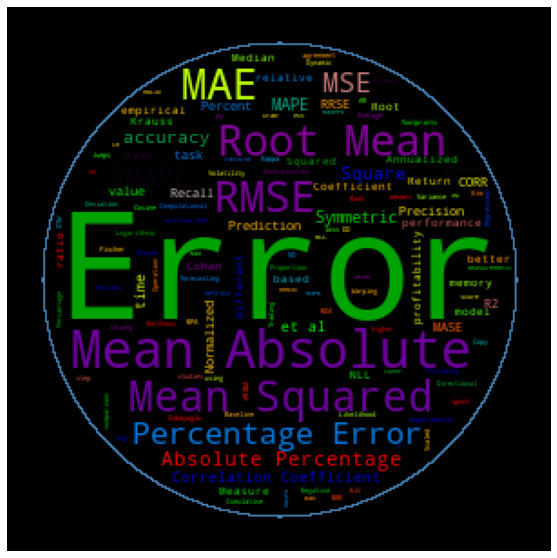

In [169]:
word_cloud(pd.Series([t for t in df.EvaluationMetric]).str.cat(sep=' ')) 

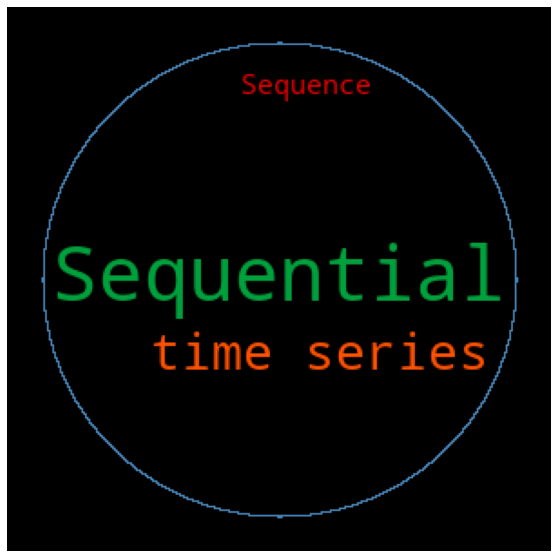

In [170]:
word_cloud(pd.Series([t for t in df.DataSetType]).str.cat(sep=' '))

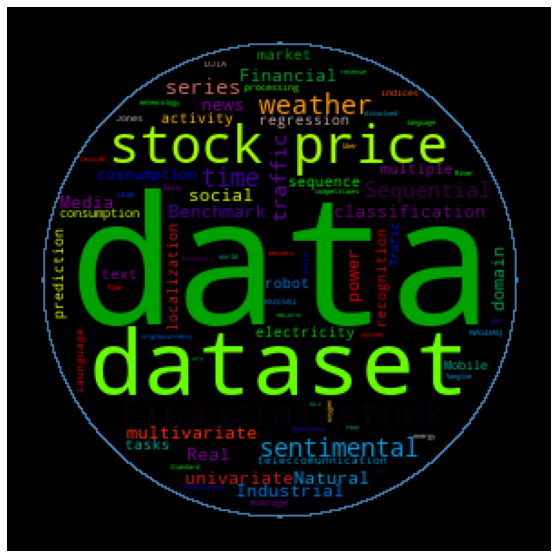

In [171]:
word_cloud(pd.Series([t for t in df.DataSet]).str.cat(sep=' '))

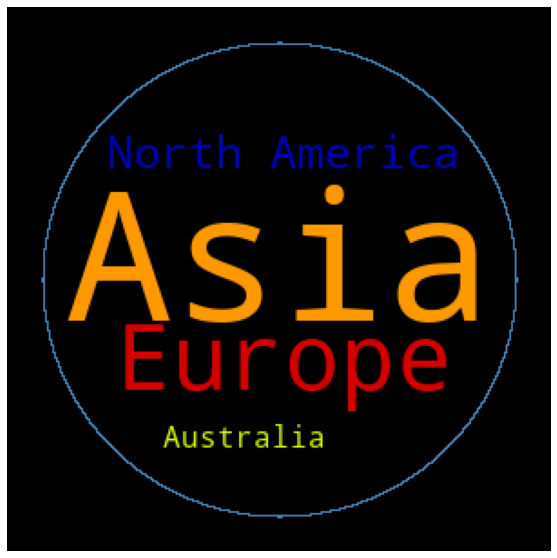

In [172]:
word_cloud(pd.Series([t for t in df.Continent]).str.cat(sep=' '))

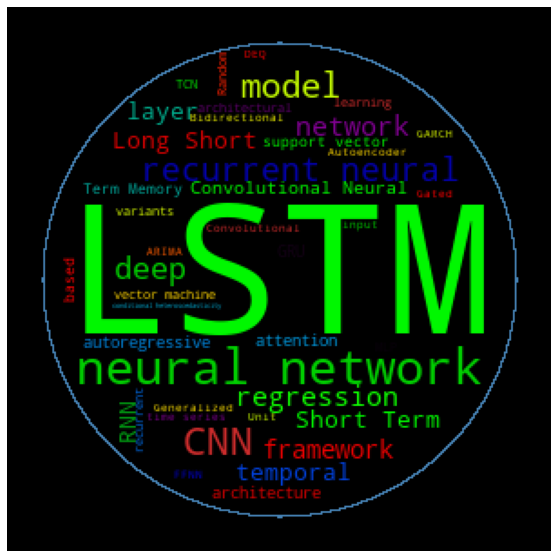

In [173]:
word_cloud(pd.Series([t for t in df.ImplementationFramework]).str.cat(sep=' '))

# 9-Financial Series Prediction: Comparison between Precision of Time Series Models and Machine Learning Method by Xin-Yao Qian (2017)

## DowJones from 2 Jan 2012- 26 Dec 2016 (Qian, 2017)

In [72]:
ddff=pd.read_csv('Dow2Jan2012-26Dec2016.csv')
ddff.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,3/1/2012,12221.19043,12479.65039,12221.19043,12397.37988,12397.37988,152560000
1,4/1/2012,12392.45996,12430.00000,12337.25000,12418.41992,12418.41992,145130000
2,5/1/2012,12418.41992,12435.98047,12283.90039,12415.70020,12415.70020,158440000
3,6/1/2012,12407.45020,12415.24023,12332.41016,12359.91992,12359.91992,131120000
4,9/1/2012,12359.30957,12409.08008,12333.84961,12392.69043,12392.69043,122200000


In [73]:
data = pd.read_csv('Dow2Jan2012-26Dec2016.csv',index_col = "Date", parse_dates = True)

In [74]:
ddff.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,3/1/2012,12221.19043,12479.65039,12221.19043,12397.37988,12397.37988,152560000
1,4/1/2012,12392.45996,12430.00000,12337.25000,12418.41992,12418.41992,145130000
2,5/1/2012,12418.41992,12435.98047,12283.90039,12415.70020,12415.70020,158440000
3,6/1/2012,12407.45020,12415.24023,12332.41016,12359.91992,12359.91992,131120000
4,9/1/2012,12359.30957,12409.08008,12333.84961,12392.69043,12392.69043,122200000


In [75]:
ddff.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [76]:
ddff["Volume"] = ddff["Volume"].astype(float)

In [77]:
ddff.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object

In [78]:
ddff.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1254.000000,1254.000000,1254.000000,1254.000000,1254.000000,1.254000e+03
mean,16040.274886,16115.625043,15963.400665,16046.190111,16046.190111,1.135434e+08
std,1946.119820,1950.295013,1940.463269,1945.354113,1945.354113,5.203313e+07
min,12101.080080,12143.690430,12035.089840,12101.459960,12101.459960,3.364000e+07
25%,14565.729980,14607.952880,14503.564945,14568.589842,14568.589842,8.530250e+07
50%,16457.470705,16528.455080,16376.935055,16458.110355,16458.110355,1.033100e+08
75%,17727.275392,17798.139645,17629.477537,17729.562503,17729.562503,1.259650e+08
max,19968.970700,19987.630860,19941.960940,19974.619140,19974.619140,6.554500e+08


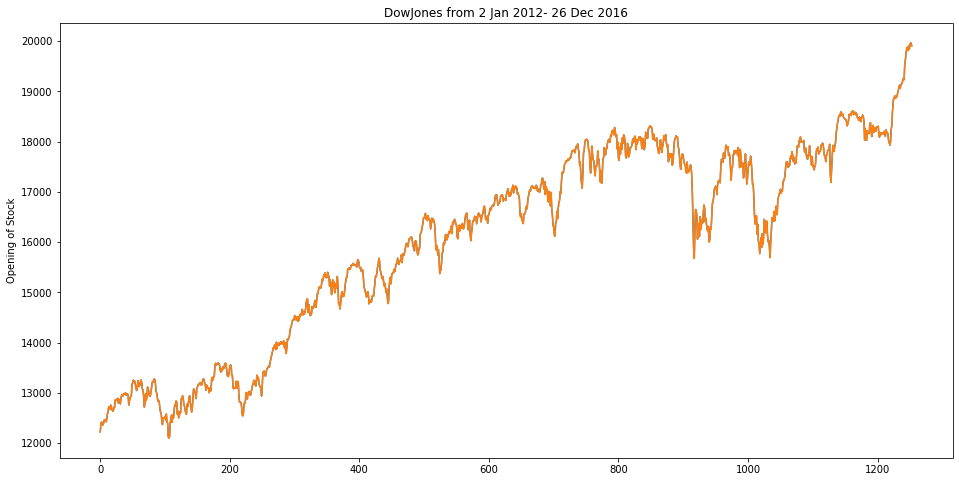

In [79]:
ddff["Open"].plot(figsize=(16,8))
plt.title('DowJones from 2 Jan 2012- 26 Dec 2016')
plt.ylabel("Opening of Stock")
plt.plot(ddff["Open"])

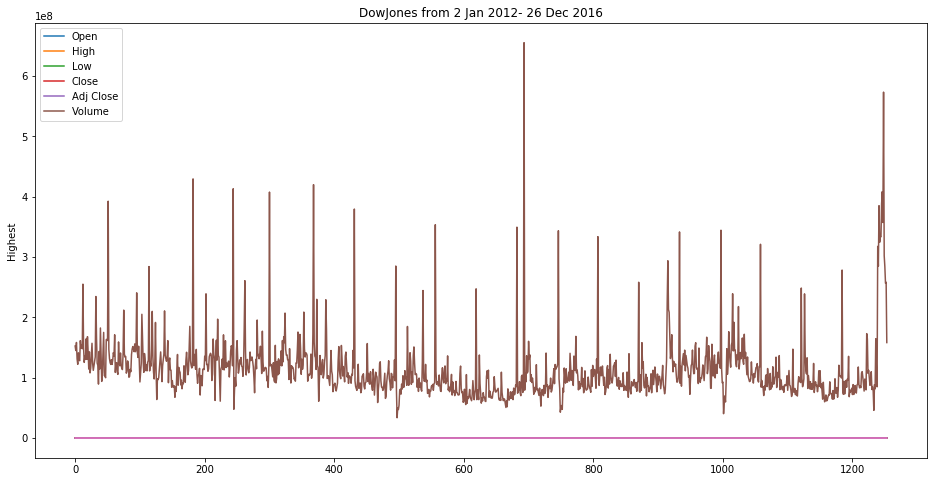

In [80]:
ax = ddff.plot(figsize=(16,8))
plt.title('DowJones from 2 Jan 2012- 26 Dec 2016')
plt.ylabel("Highest")
plt.plot(ddff["High"])

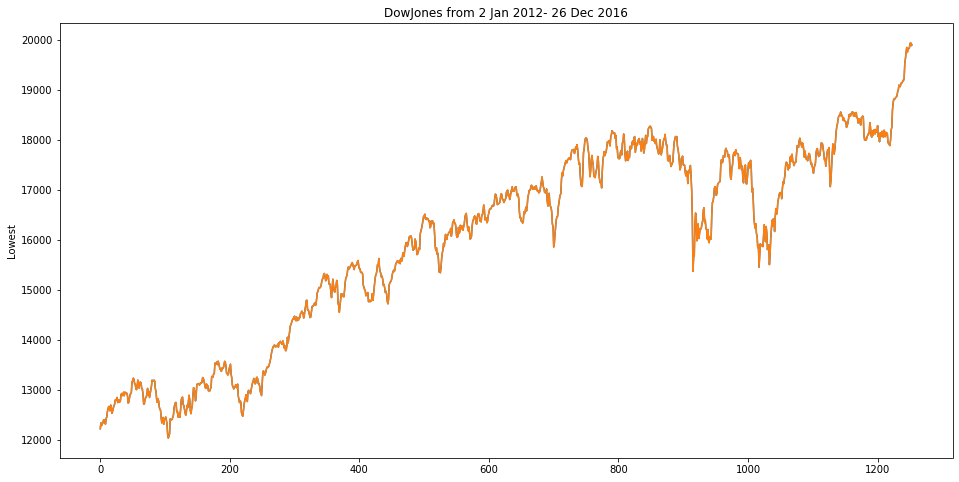

In [81]:
ddff["Low"].plot(figsize=(16,8))
plt.title('DowJones from 2 Jan 2012- 26 Dec 2016')
plt.ylabel("Lowest")
plt.plot(ddff["Low"])

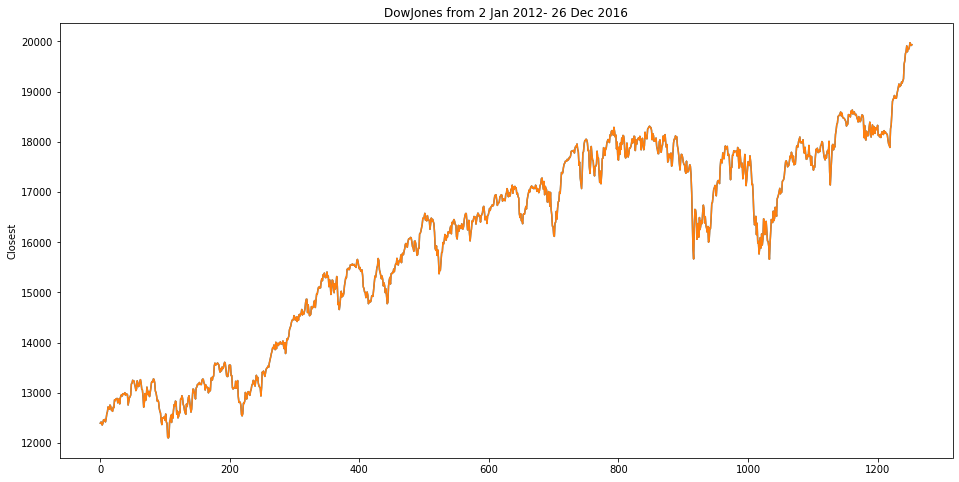

In [82]:
ddff["Close"].plot(figsize=(16,8))
plt.title('DowJones from 2 Jan 2012- 26 Dec 2016')
plt.ylabel("Closest")
plt.plot(ddff["Close"])

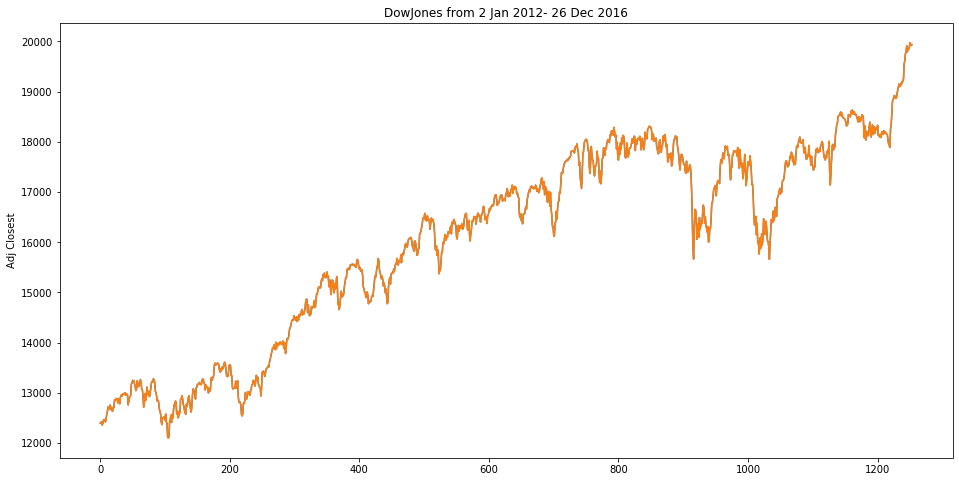

In [83]:
ddff["Adj Close"].plot(figsize=(16,8))
plt.title('DowJones from 2 Jan 2012- 26 Dec 2016')
plt.ylabel("Adj Closest")
plt.plot(ddff["Adj Close"])

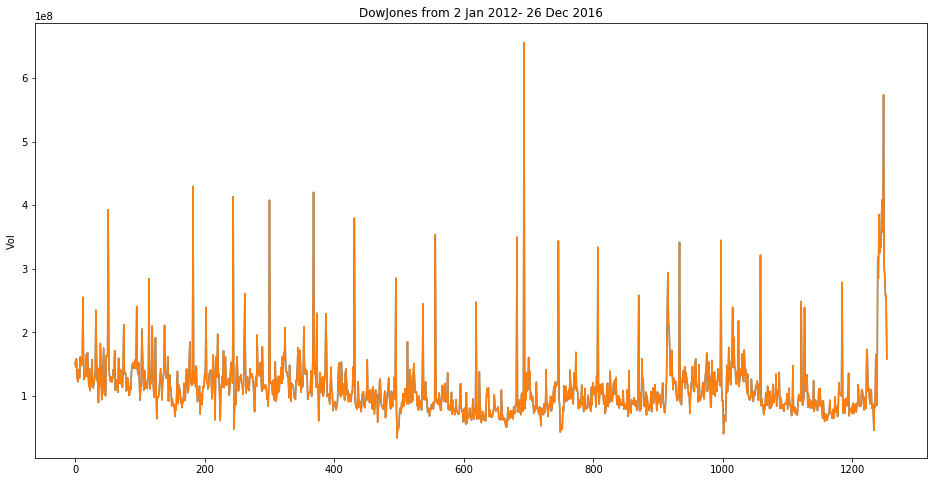

In [84]:
ddff["Volume"].plot(figsize=(16,8))
plt.title('DowJones from 2 Jan 2012- 26 Dec 2016')
plt.ylabel("Vol")
plt.plot(ddff["Volume"])

## NADAQ 2012-2016 (Qian, 2017)

In [85]:
adf=pd.read_csv('NAS2Jan2012-26Dec2016.csv')
adf.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,2657.389893,2665.899902,2641.979980,2648.719971,2648.719971,1636850000
1,2012-01-04,2639.899902,2653.179932,2627.229980,2648.360107,2648.360107,1670530000
2,2012-01-05,2642.570068,2673.560059,2631.229980,2669.860107,2669.860107,1836410000
3,2012-01-06,2671.169922,2682.120117,2658.830078,2674.219971,2674.219971,1683090000
4,2012-01-09,2682.979980,2683.780029,2662.959961,2676.560059,2676.560059,1768080000


In [86]:
adf = pd.read_csv('NAS2Jan2012-26Dec2016.csv',index_col = "Date", parse_dates = True)

In [87]:
adf.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,2657.389893,2665.899902,2641.979980,2648.719971,2648.719971,1636850000
2012-01-04,2639.899902,2653.179932,2627.229980,2648.360107,2648.360107,1670530000
2012-01-05,2642.570068,2673.560059,2631.229980,2669.860107,2669.860107,1836410000
2012-01-06,2671.169922,2682.120117,2658.830078,2674.219971,2674.219971,1683090000
2012-01-09,2682.979980,2683.780029,2662.959961,2676.560059,2676.560059,1768080000


In [88]:
adf.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [89]:
adf["Volume"] = adf["Volume"].astype(float)

In [90]:
adf.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object

## Combined display

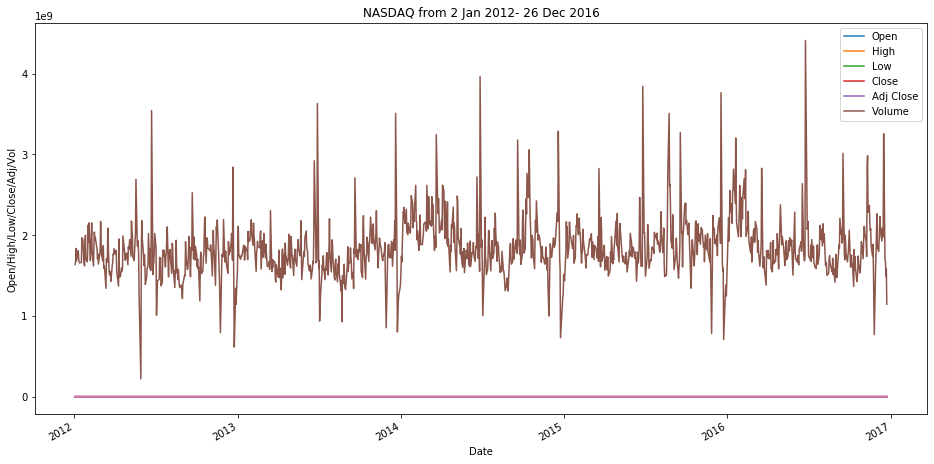

In [91]:
ax = adf.plot(figsize=(16,8))
plt.title('NASDAQ from 2 Jan 2012- 26 Dec 2016')
plt.ylabel("Open/High/Low/Close/Adj/Vol")
plt.plot(adf["Open"])

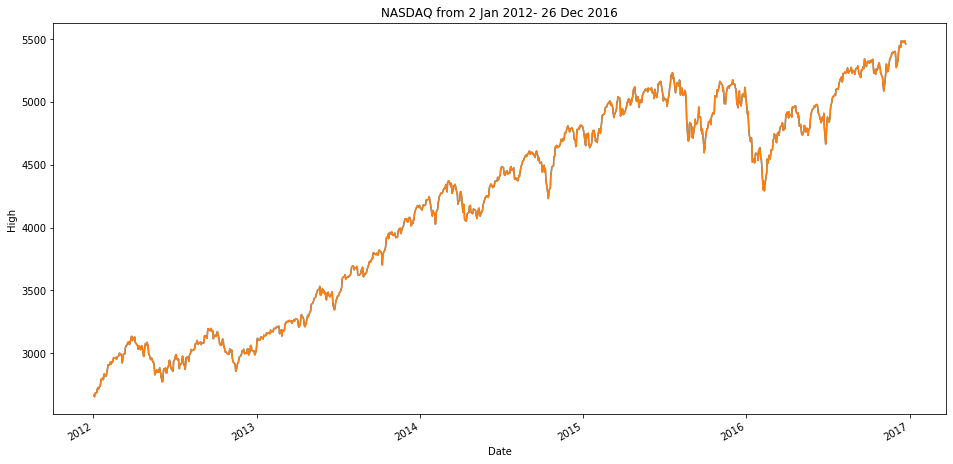

In [92]:
adf["High"].plot(figsize=(16,8))
plt.title('NASDAQ from 2 Jan 2012- 26 Dec 2016')
plt.ylabel("High")
plt.plot(adf["High"])

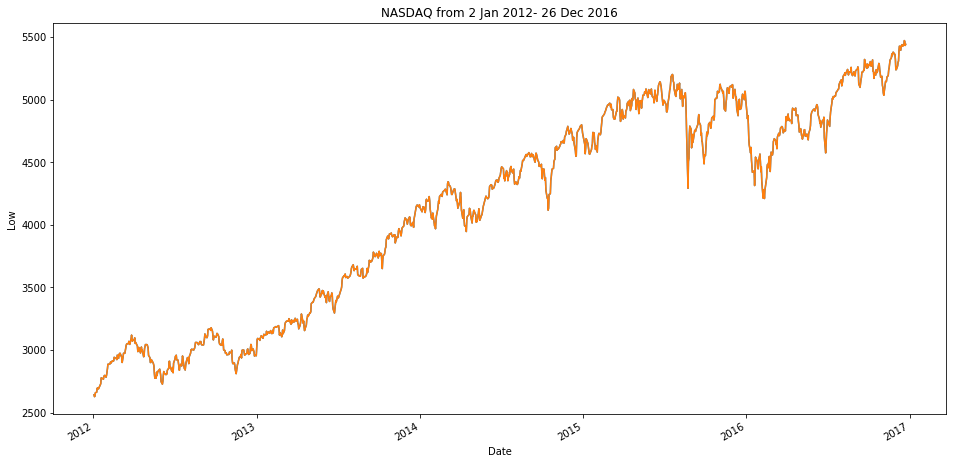

In [93]:
adf["Low"].plot(figsize=(16,8))
plt.title('NASDAQ from 2 Jan 2012- 26 Dec 2016')
plt.ylabel("Low")
plt.plot(adf["Low"])

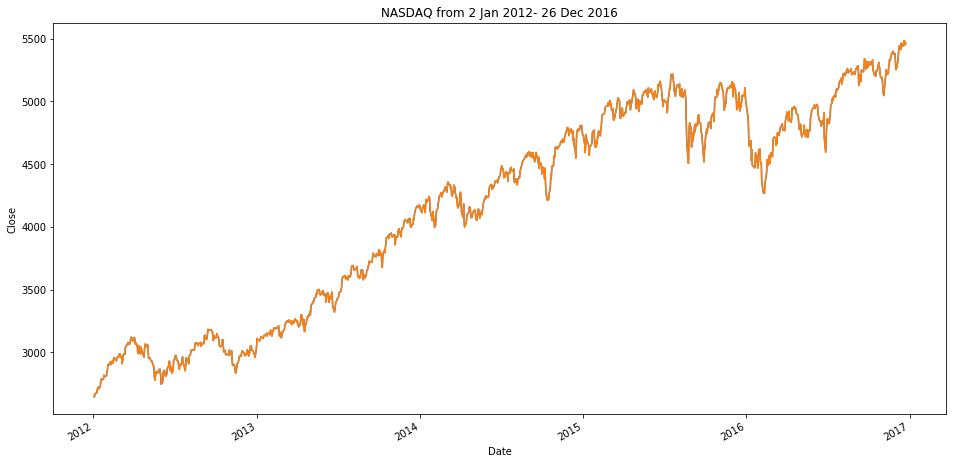

In [94]:
adf["Close"].plot(figsize=(16,8))
plt.title('NASDAQ from 2 Jan 2012- 26 Dec 2016')
plt.ylabel("Close")
plt.plot(adf["Close"])

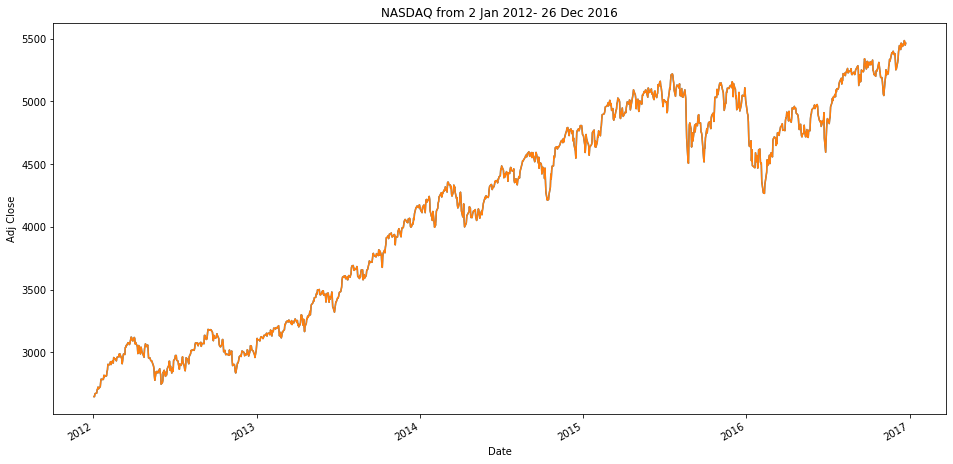

In [95]:
adf["Adj Close"].plot(figsize=(16,8))
plt.title('NASDAQ from 2 Jan 2012- 26 Dec 2016')
plt.ylabel("Adj Close")
plt.plot(adf["Adj Close"])

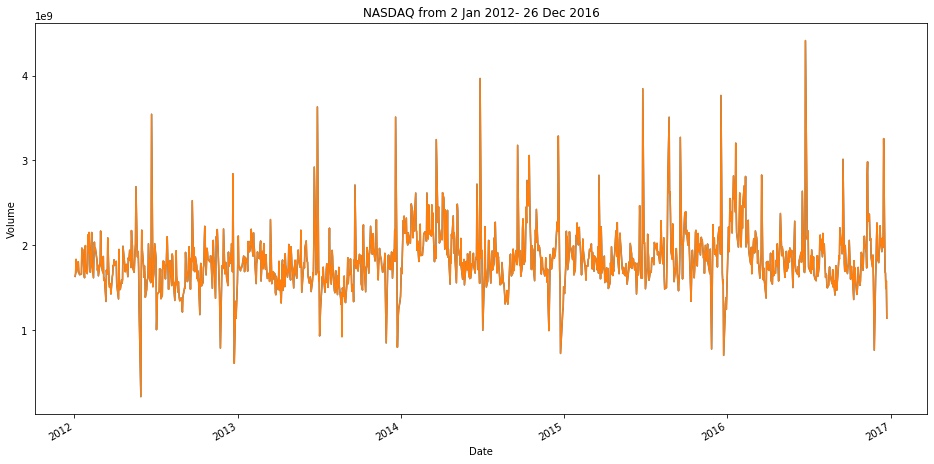

In [96]:
adf["Volume"].plot(figsize=(16,8))
plt.title('NASDAQ from 2 Jan 2012- 26 Dec 2016')
plt.ylabel("Volume")
plt.plot(adf["Volume"])

Text(0.5, 0, 'NASDAQ High')

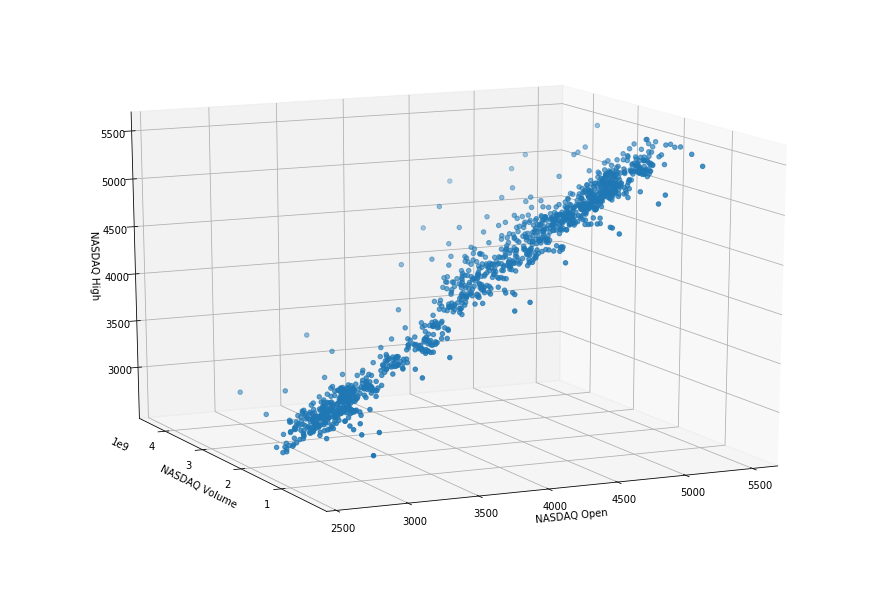

In [97]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12, 8))
ax = Axes3D(fig, azim=-115, elev=15)
ax.scatter(adf['Open'], adf['Volume'], adf['High'])
ax.set_xlabel('NASDAQ Open')
ax.set_ylabel('NASDAQ Volume')
ax.set_zlabel('NASDAQ High')

## S and P 500 from 2 Jan 2012- 26 Dec 2016 (Qian, 2017)

In [98]:
SP500=pd.read_csv('SandP5002Jan2012-26Dec2016.csv')
SP500.head()

,Date,OpenPrice,HighPrice,Lowprice,Clossing,AdjClose,VolumeA
0,3/1/2012,1258.86,1284.62,1258.86,1277.06,1277.06,3943710000
1,4/1/2012,1277.03,1278.73,1268.10,1277.30,1277.30,3592580000
2,5/1/2012,1277.30,1283.05,1265.26,1281.06,1281.06,4315950000
3,6/1/2012,1280.93,1281.84,1273.34,1277.81,1277.81,3656830000
4,9/1/2012,1277.83,1281.99,1274.55,1280.70,1280.70,3371600000


In [99]:
SP500.dtypes

Date          object
OpenPrice    float64
HighPrice    float64
Lowprice     float64
Clossing     float64
AdjClose     float64
VolumeA        int64
dtype: object

In [100]:
SP500["VolumeA"] = adff["VolumeA"].astype(float)

NameError: name 'adff' is not defined

In [101]:
SP500.dtypes

Date          object
OpenPrice    float64
HighPrice    float64
Lowprice     float64
Clossing     float64
AdjClose     float64
VolumeA        int64
dtype: object

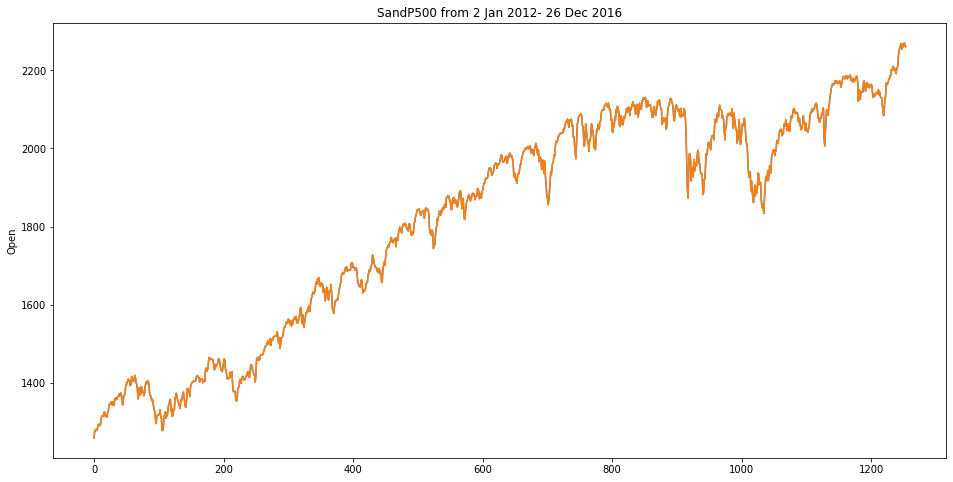

In [102]:
SP500["OpenPrice"].plot(figsize=(16,8))
plt.title('SandP500 from 2 Jan 2012- 26 Dec 2016')
plt.ylabel("Open")
plt.plot(SP500["OpenPrice"])

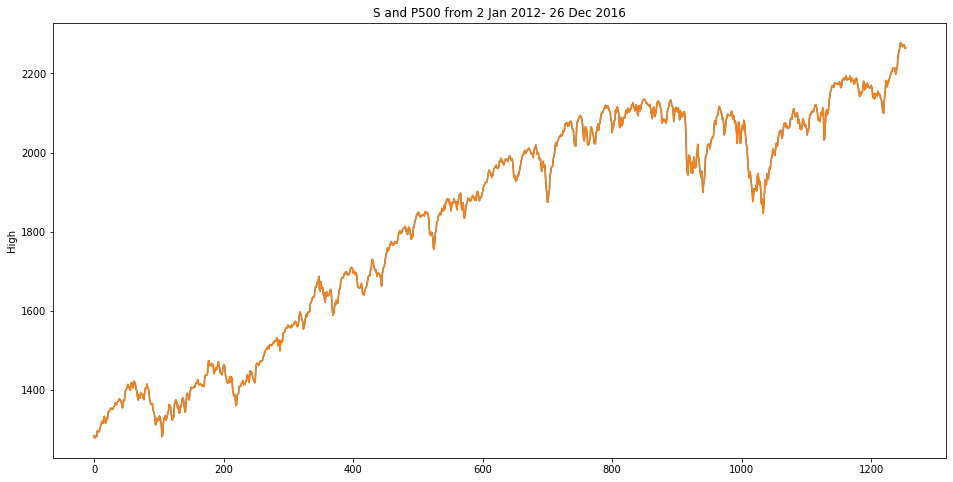

In [103]:
SP500["HighPrice"].plot(figsize=(16,8))
plt.title('S and P500 from 2 Jan 2012- 26 Dec 2016')
plt.ylabel("High")
plt.plot(SP500["HighPrice"])

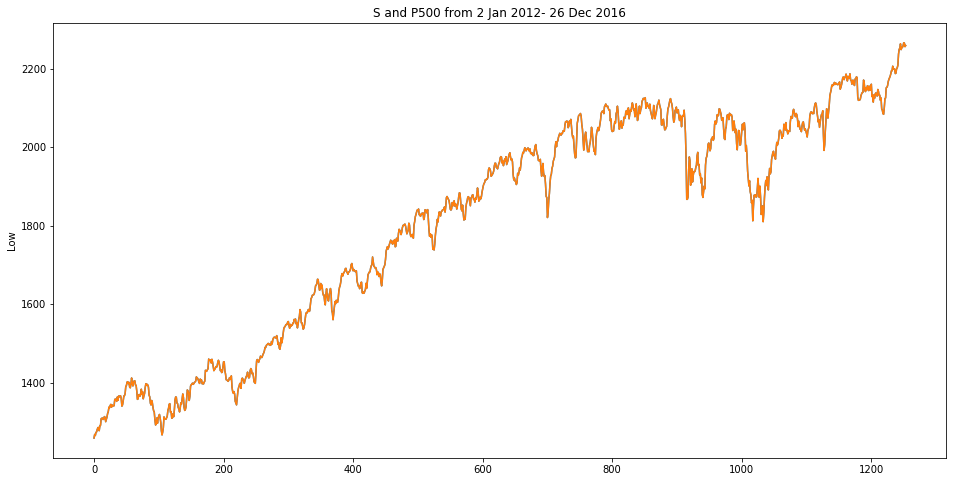

In [104]:
SP500["Lowprice"].plot(figsize=(16,8))
plt.title('S and P500 from 2 Jan 2012- 26 Dec 2016')
plt.ylabel("Low")
plt.plot(SP500["Lowprice"])

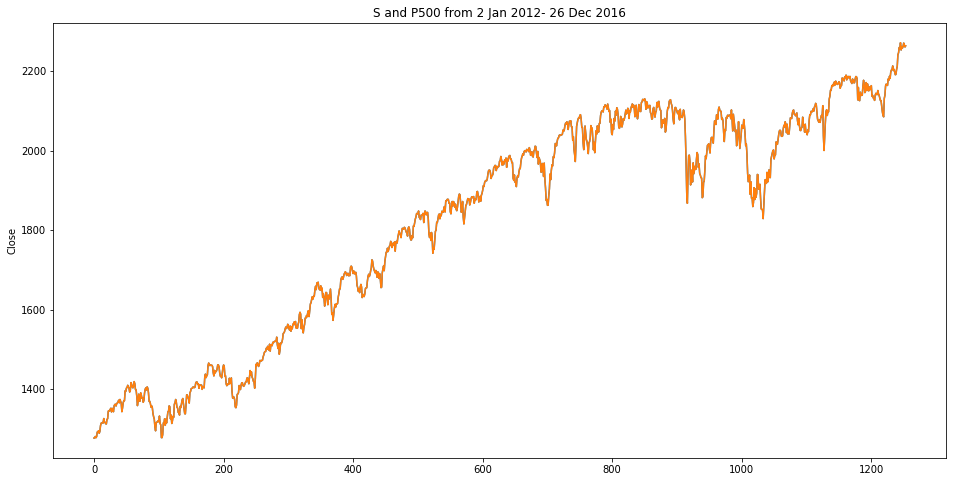

In [105]:
SP500["Clossing"].plot(figsize=(16,8))
plt.title('S and P500 from 2 Jan 2012- 26 Dec 2016')
plt.ylabel("Close")
plt.plot(SP500["Clossing"])

# 12-Improved Forecasting of Cryptocurrency Price using Social Signals by Glenski et al (2019)

## Bitcoin Dataset 2010-2018

In [106]:
dataa = pd.read_csv('12Bitcoin2010to2018.csv',index_col = "Date", parse_dates = True)

In [107]:
dataa.head()

,Price,Open,High,Low,Vol,Change %
Date,,,,,,
2018-05-21,8403.3,8529.5,8550.6,8375.5,11552.00,-1.47%
2018-05-20,8529.0,8243.9,8580.4,8184.7,11376.00,3.44%
2018-05-19,8245.1,8244.7,8389.1,8153.2,10789.00,-0.01%
2018-05-18,8245.7,8064.4,8273.6,7939.8,15032.00,2.27%
2018-05-17,8063.0,8344.6,8458.7,8022.3,15436.00,-3.37%


In [108]:
dataa.dtypes

Price       float64
Open        float64
High        float64
Low         float64
Vol          object
Change %     object
dtype: object

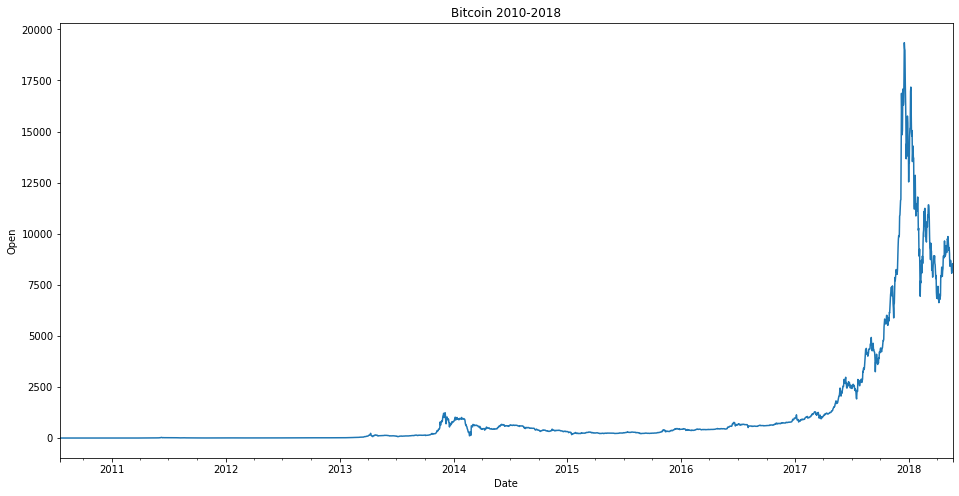

In [109]:
dataa["Open"].plot(figsize=(16,8))
plt.title('Bitcoin 2010-2018')
plt.ylabel("Open")
plt.plot(dataa["Open"])

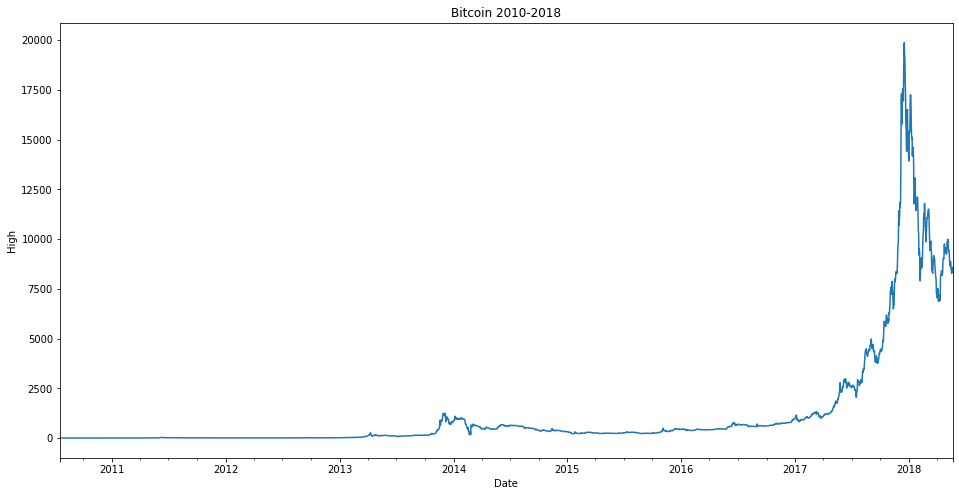

In [110]:
dataa["High"].plot(figsize=(16,8))
plt.title('Bitcoin 2010-2018')
plt.ylabel("High")
plt.plot(dataa["High"])

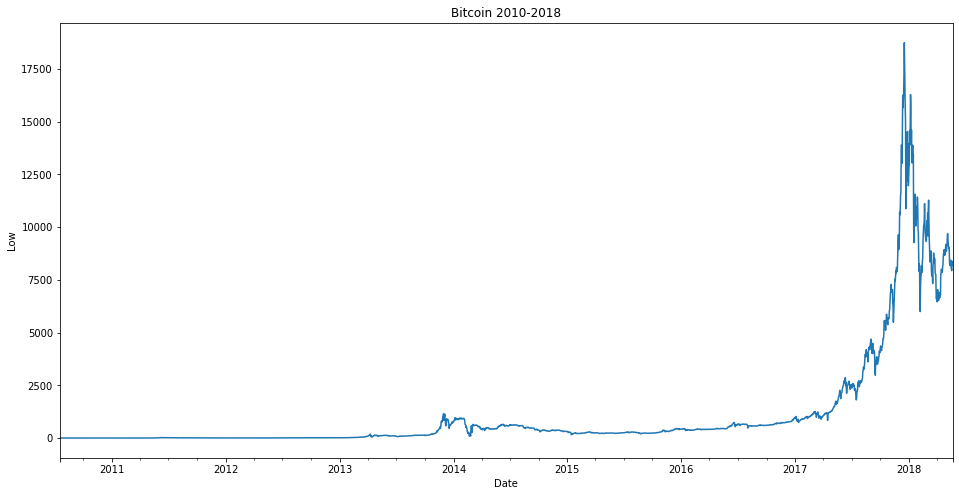

In [111]:
dataa["Low"].plot(figsize=(16,8))
plt.title('Bitcoin 2010-2018')
plt.ylabel("Low")
plt.plot(dataa["Low"])

## Monero Dataset

In [112]:
mon=pd.read_csv('12Monero2010to2018.csv')

In [113]:
mon.head()

,Date\tPrice\tOpen\tHigh\tLow\tVol.\tChange %
0,"May 21, 2018\t0.023632\t0.023871\t0.023889\t0...."
1,"May 20, 2018\t0.02388\t0.024\t0.024125\t0.0237..."
2,"May 19, 2018\t0.024\t0.024755\t0.024845\t0.023..."
3,"May 18, 2018\t0.024749\t0.023625\t0.0257\t0.02..."
4,"May 17, 2018\t0.023673\t0.02381\t0.02433\t0.02..."


In [114]:
mon.dtypes

Date\tPrice\tOpen\tHigh\tLow\tVol.\tChange %    object
dtype: object

## 21-Comparison of Deep Learning Models on Time Series Forecasting: A Case Study of Dissolved Oxygen Prediction, Qin (2019) based on water quality data

In [115]:
dtf=pd.read_csv('21WaterQualityDataMonitor.csv')
dtf.head()

,Timeline,DO
0,00:00.0,5.4586
1,30:00.0,5.4082
2,00:00.0,5.2854
3,30:00.0,5.1605
4,00:00.0,5.0621


In [116]:
dtf.dtypes

Timeline     object
DO          float64
dtype: object

In [117]:
dtf['Timeline'] = dtf['DO'].astype(int) / 1E9

Text(0.5, 0, 'DO')

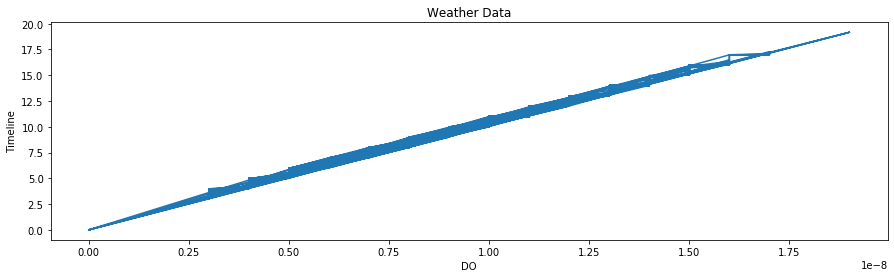

In [118]:
plt.figure(figsize=(15,4))
plt.plot(dtf["Timeline"].values, dtf["DO"].values)  
plt.title('Weather Data')
plt.ylabel("Timeline")
plt.xlabel("DO")

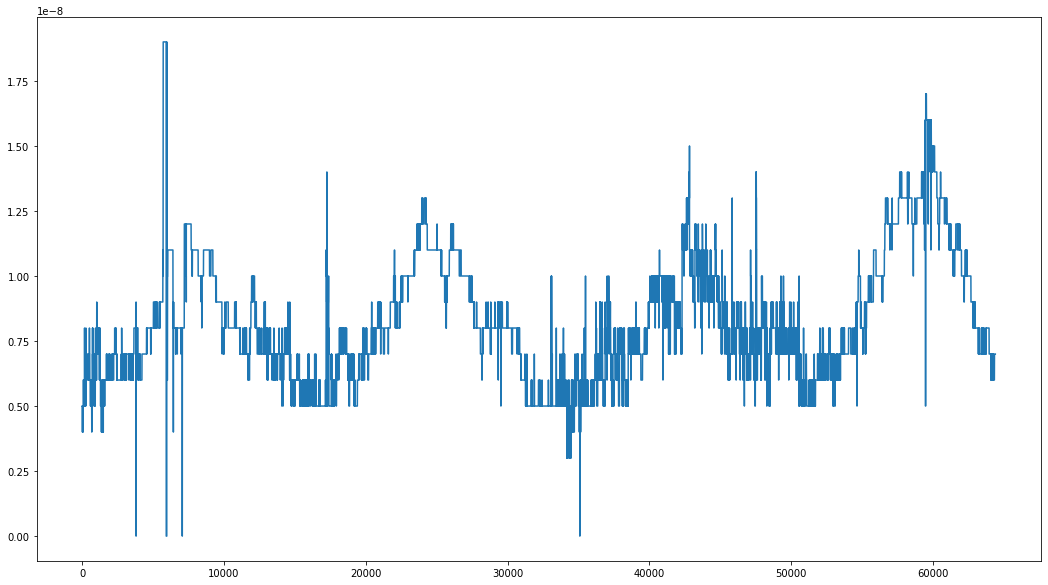

In [119]:
dtf['Timeline'].plot(figsize=(18,10))

# 1-Deep and Confident Prediction by Chang et al 2018

## Weather Dataset

In [120]:
ds=pd.read_csv('1dengue_features_train.csv')
ds.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [121]:
ds.dtypes

city                                      object
year                                       int64
weekofyear                                 int64
week_start_date                           object
ndvi_ne                                  float64
ndvi_nw                                  float64
ndvi_se                                  float64
ndvi_sw                                  float64
precipitation_amt_mm                     float64
reanalysis_air_temp_k                    float64
reanalysis_avg_temp_k                    float64
reanalysis_dew_point_temp_k              float64
reanalysis_max_air_temp_k                float64
reanalysis_min_air_temp_k                float64
reanalysis_precip_amt_kg_per_m2          float64
reanalysis_relative_humidity_percent     float64
reanalysis_sat_precip_amt_mm             float64
reanalysis_specific_humidity_g_per_kg    float64
reanalysis_tdtr_k                        float64
station_avg_temp_c                       float64
station_diur_temp_rn

In [122]:
ds["year"] = ds["year"].astype(float)

In [123]:
ds["weekofyear"] = ds["weekofyear"].astype(float)

In [124]:
ds.dtypes

city                                      object
year                                     float64
weekofyear                               float64
week_start_date                           object
ndvi_ne                                  float64
ndvi_nw                                  float64
ndvi_se                                  float64
ndvi_sw                                  float64
precipitation_amt_mm                     float64
reanalysis_air_temp_k                    float64
reanalysis_avg_temp_k                    float64
reanalysis_dew_point_temp_k              float64
reanalysis_max_air_temp_k                float64
reanalysis_min_air_temp_k                float64
reanalysis_precip_amt_kg_per_m2          float64
reanalysis_relative_humidity_percent     float64
reanalysis_sat_precip_amt_mm             float64
reanalysis_specific_humidity_g_per_kg    float64
reanalysis_tdtr_k                        float64
station_avg_temp_c                       float64
station_diur_temp_rn

Text(0.5, 0, 'year')

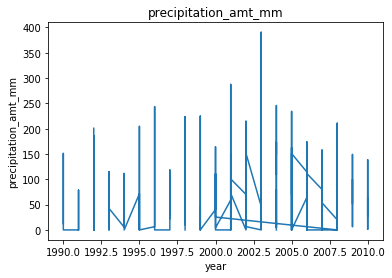

In [125]:
plt.plot(ds["year"].values, ds["precipitation_amt_mm"].values)
plt.title('precipitation_amt_mm')
plt.ylabel("precipitation_amt_mm")
plt.xlabel("year")
#plt.plot(ds["precipitation_amt_mm"])

Text(0.5, 0, 'year')

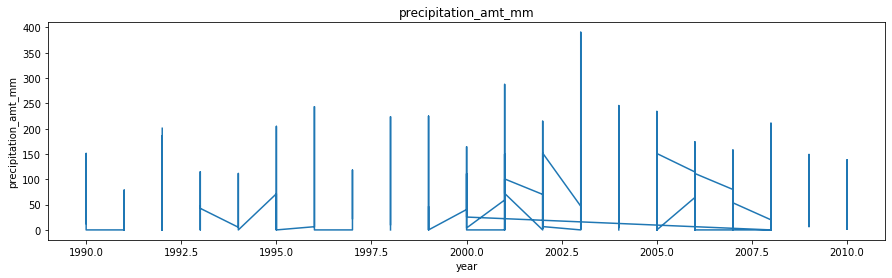

In [126]:
plt.figure(figsize=(15,4))
plt.plot(ds["year"].values, ds["precipitation_amt_mm"].values)  
plt.title('precipitation_amt_mm')
plt.ylabel("precipitation_amt_mm")
plt.xlabel("year")
#plt.plot(ds["precipitation_amt_mm"])

Text(0.5, 0, 'Rain Analysis')

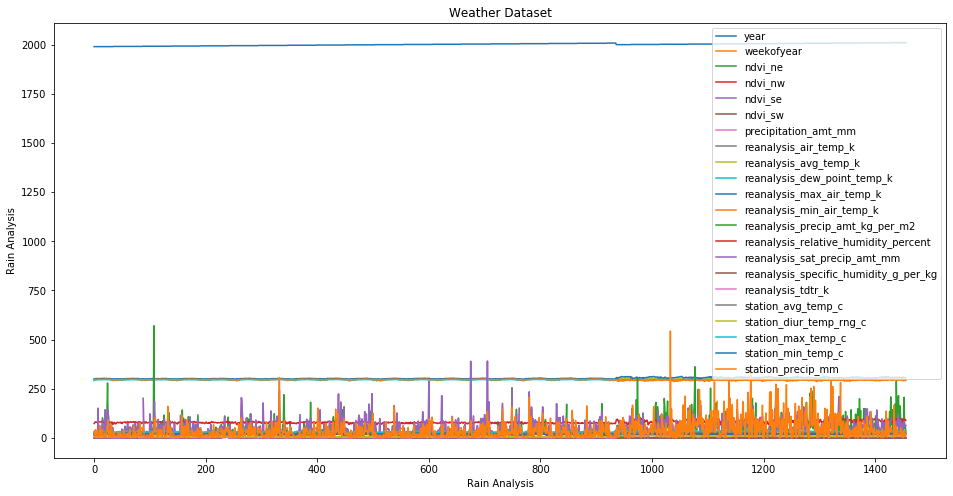

In [127]:
ax = ds.plot(figsize=(16,8))
plt.title('Weather Dataset')
plt.ylabel("Rain Analysis")
plt.xlabel("Rain Analysis")